In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [18]:
df = pd.read_csv("output.csv")
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [20]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}") 
print(f"missing data: {sum(df.isna().sum())}")

Rows: 104, Columns: 7
Duplicates: 0
missing data: 0


In [21]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [22]:
df.tail()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


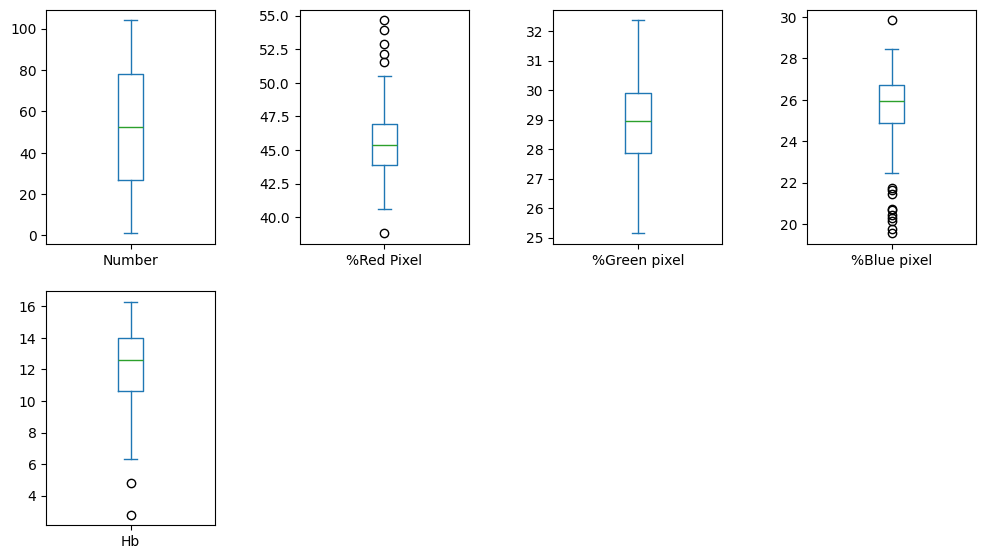

In [23]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5); 


In [24]:
def Handle_outlier(df, column_name):
    # HITUNG Q1 DAN Q3
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)

    # HITUNG IQR
    IQR = Q3 - Q1   

    # Tentukan Batas Bawah Dan Batas Atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # IDENTIFIKASI OUTLIER DENGAN INTERQUARTIL
    outliers = df[column_name][(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers berdasarkan IQR untuk kolom {column_name}:")
        print(outliers)
    else:
        print(f"Tidak ditemukan outlier untuk kolom {column_name} berdasarkan metode interquartile.")

    # GANTI NILAI OUTLIER
    df[column_name] = np.where((df[column_name] < lower_bound), lower_bound, df[column_name])
    df[column_name] = np.where((df[column_name] > upper_bound), upper_bound, df[column_name])



In [25]:
Handle_outlier(df, '%Red Pixel')
Handle_outlier(df, '%Blue pixel')
Handle_outlier(df, 'Hb')

Outliers berdasarkan IQR untuk kolom %Red Pixel:
64    38.7968
72    52.9108
75    53.9113
88    54.6478
95    52.1540
96    51.5802
Name: %Red Pixel, dtype: float64
Outliers berdasarkan IQR untuk kolom %Blue pixel:
59    20.4232
64    29.8414
72    20.3010
73    20.6960
75    19.7433
76    21.4347
88    19.5413
89    21.6431
95    21.7607
96    20.1520
99    20.7141
Name: %Blue pixel, dtype: float64
Outliers berdasarkan IQR untuk kolom Hb:
12    4.8
58    2.8
Name: Hb, dtype: float64


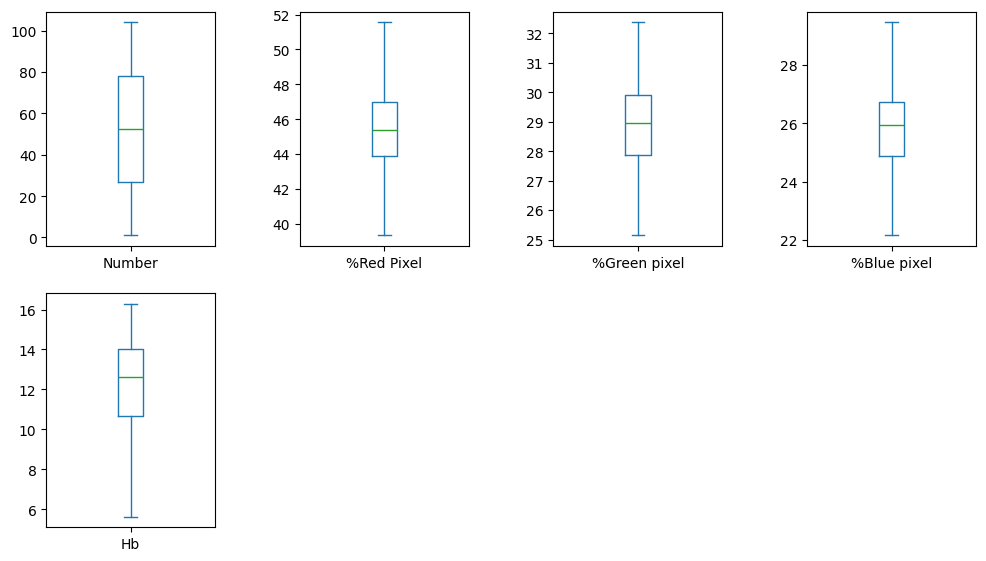

In [26]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5); 


In [27]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.902500,6.3,Yes
1,2,F,45.6033,28.1900,26.206700,13.5,No
2,3,F,45.0107,28.9677,26.021500,11.7,No
3,4,F,44.5398,28.9899,26.470300,13.5,No
4,5,M,43.2870,30.6972,26.015800,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,22.158662,14.5,Yes
100,101,M,42.2324,30.6757,27.091900,6.3,Yes
101,102,F,45.6064,31.9084,22.485200,12.7,No
102,103,M,45.2095,29.2769,25.513600,13.4,No


In [28]:
df['Sex'].value_counts()

Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64

In [29]:
df['Anaemic'].value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

In [30]:
df['Sex'] = df['Sex'].replace('F ', 'F')
df['Sex'] = df['Sex'].replace('M ', 'M')
df['Sex'].value_counts()


Sex
M    55
F    49
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping1 = {'M':0,'F':1,}
mapping2 = {'No':0,'Yes':1}
df['Sex'] = le.fit_transform(df['Sex'].map(mapping1))
df['Anaemic'] = le.fit_transform(df['Anaemic'].map(mapping2))
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0,43.2555,30.8421,25.902500,6.3,1
1,2,1,45.6033,28.1900,26.206700,13.5,0
2,3,1,45.0107,28.9677,26.021500,11.7,0
3,4,1,44.5398,28.9899,26.470300,13.5,0
4,5,0,43.2870,30.6972,26.015800,12.4,0
...,...,...,...,...,...,...,...
99,100,1,49.9999,29.2860,22.158662,14.5,1
100,101,0,42.2324,30.6757,27.091900,6.3,1
101,102,1,45.6064,31.9084,22.485200,12.7,0
102,103,0,45.2095,29.2769,25.513600,13.4,0


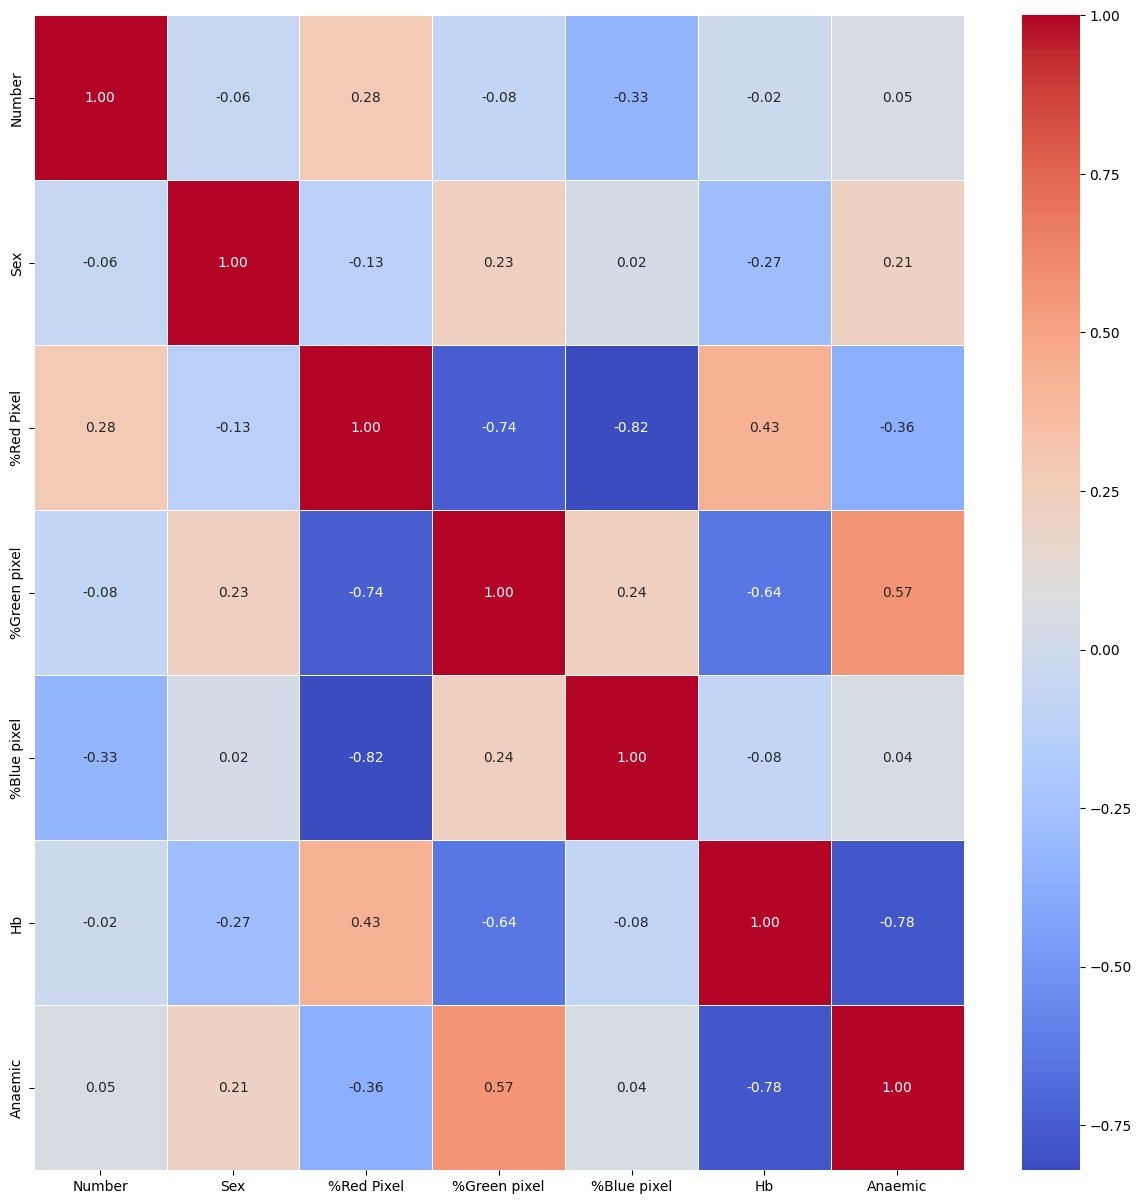

In [33]:
import matplotlib.pyplot as plt #korelasi hubungan antar variabel dapat dilihat dari korelasi di bawah
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [34]:
import scipy
from scipy import stats

kolom=len(df.columns)
z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df.iloc[:,i],df.iloc[:,-1])
  z.append([i,df.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,5,Hb,0.776653
1,3,%Green pixel,0.566447
2,2,%Red Pixel,0.361302
3,1,Sex,0.211307
4,0,Number,0.053997
5,4,%Blue pixel,0.044425


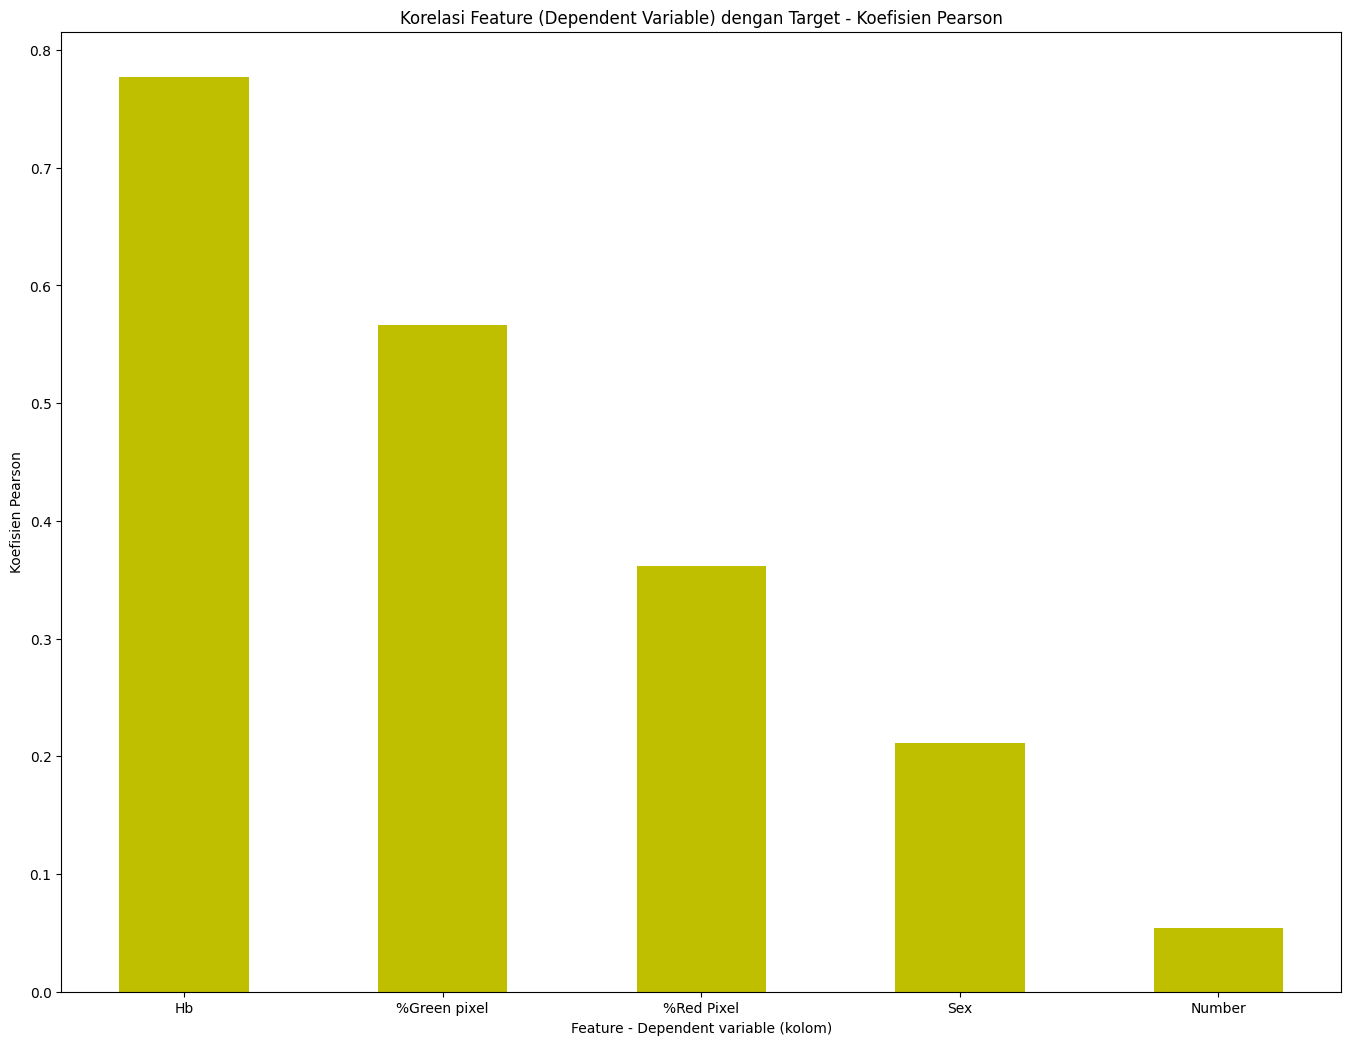

In [35]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

In [36]:
df = df.drop(["Number"], axis=1)
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,0,43.2555,30.8421,25.902500,6.3,1
1,1,45.6033,28.1900,26.206700,13.5,0
2,1,45.0107,28.9677,26.021500,11.7,0
3,1,44.5398,28.9899,26.470300,13.5,0
4,0,43.2870,30.6972,26.015800,12.4,0
...,...,...,...,...,...,...
99,1,49.9999,29.2860,22.158662,14.5,1
100,0,42.2324,30.6757,27.091900,6.3,1
101,1,45.6064,31.9084,22.485200,12.7,0
102,0,45.2095,29.2769,25.513600,13.4,0


In [37]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

# TRAINING & CREATE MODELS

DECISION TREE

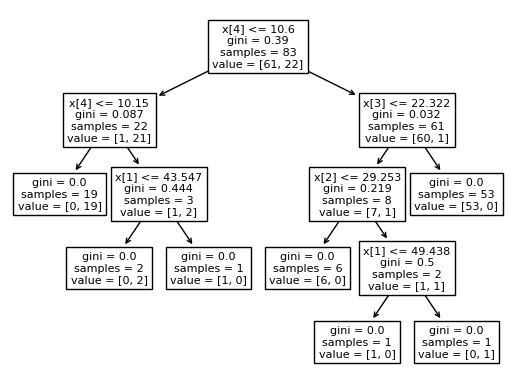

In [44]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
tree.plot_tree(clf)
zeroes = 0
ones=0


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)

In [46]:
scores1 = cross_val_score(clf, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[1.         0.90909091 0.90909091 1.         0.8        1.
 0.9        1.         1.         1.        ]
rata rata KFold nya adalah:  0.9518181818181819


In [47]:
prediksi1 = clf.predict(x_test)
prediksi1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  100.0 %


In [49]:
accuracy_Decision_rep = accuracy_score(y_test, prediksi1)
classification_rep_Decision = classification_report(y_test, prediksi1)

print(f'Accuracy: {accuracy_Decision_rep}')
print(f'Classification Report:\n{classification_rep_Decision}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



LOGISTIC REGRESSION

In [50]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [51]:
scores2 = cross_val_score(classifier, x, y, cv=kf)
print(scores2)
print('rata rata KFold nya adalah: ',scores2.mean())

[0.90909091 1.         0.81818182 0.90909091 1.         1.
 0.9        1.         1.         1.        ]
rata rata KFold nya adalah:  0.9536363636363637


In [52]:
y_predlog = classifier.predict(x_test)
y_predlog

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [53]:
accuracylog = accuracy_score(y_test, y_predlog)
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')

Akurasi menggunkan algoritma logistic Regression adalah : 100.0 %


In [54]:
accuracy_LOG_rep = accuracy_score(y_test, y_predlog)
classification_rep_LOG = classification_report(y_test, y_predlog)

print(f'Accuracy: {accuracy_LOG_rep}')
print(f'Classification Report:\n{classification_rep_LOG}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



NAIVE BAYES

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_prednaive = nb.predict(x_test)
y_prednaive

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [56]:
scores3 = cross_val_score(nb, x, y, cv=kf)
print(scores3)
print('rata rata KFold nya adalah: ',scores3.mean())

[0.90909091 0.90909091 1.         0.90909091 1.         1.
 1.         0.9        0.8        0.9       ]
rata rata KFold nya adalah:  0.9327272727272728


In [57]:
accuracynavie = accuracy_score(y_test, y_prednaive)
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')

Akurasi menggunakan algoritma naive bayes : 100.0 %


In [58]:
accuracy_Naive_rep = accuracy_score(y_test, y_prednaive)
classification_rep_Naive = classification_report(y_test, y_prednaive)

print(f'Accuracy: {accuracy_Naive_rep}')
print(f'Classification Report:\n{classification_rep_Naive}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)
y_predknn

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
scores4 = cross_val_score(knn, x, y, cv=kf)
print(scores4)
print('rata rata KFold nya adalah: ',scores4.mean())

[0.90909091 0.90909091 0.72727273 1.         0.9        0.9
 1.         0.9        1.         0.8       ]
rata rata KFold nya adalah:  0.9045454545454547


In [61]:
accuracyknn = accuracy_score(y_test, y_predknn)
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')

akurasi untuk penggunaan algoritma KNN adalah : 100.0 %


In [62]:
accuracy_KNN_rep = accuracy_score(y_test, y_predknn)
classification_rep_KNN = classification_report(y_test, y_predknn)

print(f'Accuracy: {accuracy_KNN_rep}')
print(f'Classification Report:\n{classification_rep_KNN}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



LINEAR DESCRIMINANT ANALYSIST LDA

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predLDA = lda.predict(x_test)
accuracyLDA = accuracy_score(y_test, y_predLDA)
y_predLDA

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [64]:
scores5 = cross_val_score(lda, x, y, cv=kf)
print(scores5)
print('rata rata KFold nya adalah: ',scores5.mean())

[1.  1.  1.  1.  0.9 1.  0.9 0.9 1.  1. ]
rata rata KFold nya adalah:  0.97


In [65]:
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')

Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 100.0 %


In [66]:
accuracy_LDA_rep = accuracy_score(y_test, y_predLDA)
classification_rep_LDA = classification_report(y_test, y_predLDA)

print(f'Accuracy: {accuracy_LDA_rep}')
print(f'Classification Report:\n{classification_rep_LDA}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



EXTRA TRESS CLASIFIER

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
y_predETC = model.predict(x_test)
accuracyETC = accuracy_score(y_test, y_predETC)
y_predETC

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [68]:
scores6 = cross_val_score(model, x, y, cv=kf)
print(scores6)
print('rata rata nya adalah: ',scores6.mean())

[1.  1.  1.  1.  0.9 0.9 0.7 0.9 1.  0.9]
rata rata nya adalah:  0.93


In [69]:
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')

Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 100.0 %


In [70]:
accuracy_ETC_rep = accuracy_score(y_test, y_predETC)
classification_rep_ETC = classification_report(y_test, y_predETC)

print(f'Accuracy: {accuracy_ETC_rep}')
print(f'Classification Report:\n{classification_rep_ETC}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



RANDOM FOREST

In [71]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators = 25, random_state=2)
Random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=7, shuffle=True)

In [73]:
scores7 = cross_val_score(Random_forest, x, y, cv=kf)
print(scores7)
print('rata rata KFold nya adalah: ',scores7.mean())

[0.86666667 0.93333333 0.93333333 1.         1.         1.
 1.        ]
rata rata KFold nya adalah:  0.9619047619047619


In [74]:
forest_pred = Random_forest.predict(x_test)
forest_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(forest_pred,y_test)*100,'%')

Accuracy Score untuk algoritma Random Forest Adalah :  100.0 %


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
accuracy_Random_Forest = accuracy_score(y_test, forest_pred)
classification_rep = classification_report(y_test, forest_pred)

print(f'Accuracy: {accuracy_Random_Forest}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



KESIMPULAN DARI KESELURUHAN K FOLD

In [79]:
print('rata rata decision tree adalah: ',scores1.mean())
print('rata rata logistic regression adalah: ',scores2.mean())
print('rata rata naive bayes adalah: ',scores3.mean())
print('rata rata KNN adalah: ',scores4.mean())
print('rata rata Linear Discriminant Analysis adalah: ',scores5.mean())
print('rata rata ExtraTreesClassifier adalah: ',scores6.mean())
print('rata rata RandomForest nya adalah: ',scores7.mean())
print('=='*40)


rata rata decision tree adalah:  0.9518181818181819
rata rata logistic regression adalah:  0.9536363636363637
rata rata naive bayes adalah:  0.9327272727272728
rata rata KNN adalah:  0.9045454545454547
rata rata Linear Discriminant Analysis adalah:  0.97
rata rata ExtraTreesClassifier adalah:  0.93
rata rata RandomForest nya adalah:  0.9619047619047619


KESELURUHAN DARI HASIL 7 ALGORITMA

In [80]:
#kesimpulan dari beberapa algoritma pengukuran yang telah dilakukan
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')
print('Accuracy Score untuk algoritma Random Forest Adalah : ',accuracy_score(forest_pred,y_test)*100,'%')
print('=='*40)

Accuracy Score untuk algoritma Decision Tree :  100.0 %
Akurasi menggunkan algoritma logistic Regression adalah : 100.0 %
Akurasi menggunakan algoritma naive bayes : 100.0 %
akurasi untuk penggunaan algoritma KNN adalah : 100.0 %
Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 100.0 %
Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 100.0 %
Accuracy Score untuk algoritma Random Forest Adalah :  100.0 %


Nilai AUC Klasifikasi:  1.0
Nilai TPR (True Positive Rate) Klasifikasi:  [0. 1. 1.]
Nilai FPR (False Positive Rate) Klasifikasi:  [0. 0. 1.]
Akurasi Klasifikasi:  100.0 %
f-measure score:  1.0
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


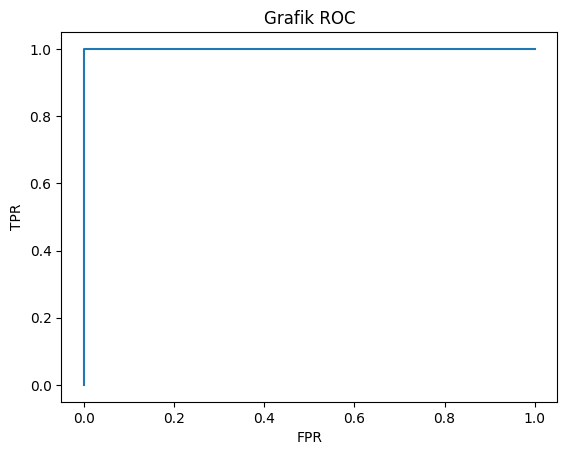

In [81]:
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prednaive, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_prednaive,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,y_prednaive,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

Nilai AUC Klasifikasi:  1.0
Nilai TPR (True Positive Rate) Klasifikasi:  [0. 1. 1.]
Nilai FPR (False Positive Rate) Klasifikasi:  [0. 0. 1.]
Akurasi Klasifikasi:  100.0 %
f-measure score:  1.0
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


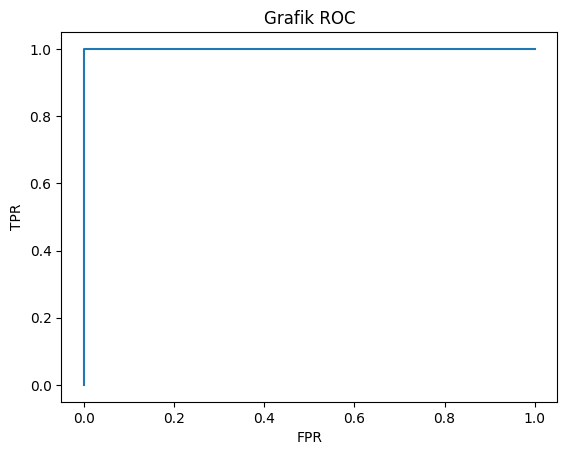

In [82]:
#ALGORITMA LINEAR DESCRIMINANT ANALYSIST
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predLDA, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_predLDA,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,y_predLDA,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

# TAHAP EVALUASI

ENSEMBLE METHOD

In [87]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Misalkan Anda sudah memiliki 7 model dalam dictionary 'models'
models = {
    'model1': clf,
    'model2': classifier,
    'model3': nb,
    'model4': knn,
    'model5': lda,
    'model6': model,
    'model7': Random_forest
}

# Dictionary untuk menyimpan skor rata-rata setiap model
model_scores = {}

# Melakukan cross-validation dan menyimpan skor rata-rata
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5)  # Menggunakan 5-fold cross-validation
    model_scores[name] = np.mean(scores)

# Memilih dua model terbaik berdasarkan skor rata-rata
sorted_model_scores = sorted(model_scores.items(), key=lambda item: item[1], reverse=True)[:2]
best_models = {name: models[name] for name, score in sorted_model_scores}

# Menampilkan dua model terbaik dan skornya
print("Dua model terbaik yang berhasil dipilih:")
for name, score in sorted_model_scores:
    print(f"{name}: {score:.4f}")

# Mengambil model terbaik dari dictionary 'models'
best_models = {name: models[name] for name in best_models.keys()}


Dua model terbaik yang berhasil dipilih:
model7: 0.9757
model2: 0.9640


Akurasi yang didapat: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



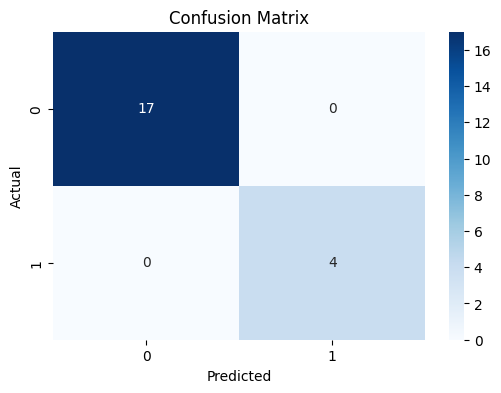

In [88]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat daftar estimator
estimators = [(name, model) for name, model in best_models.items()]

# Membuat Stacking Classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Melatih model stacking
stacking_model.fit(x_train, y_train)

# Membuat prediksi
y_pred = stacking_model.predict(x_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapat: {accuracy:.4f}")

# Menampilkan Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
